In [1]:
import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

X = joblib.load("../models/tfidf_features.pkl")
df = pd.read_csv("../data/processed/cleaned_data.csv")
y = df["problem_class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)



In [2]:
lr = LogisticRegression(max_iter=1000, n_jobs=-1)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))


c:\Users\hp\OneDrive\Desktop\AutoJudge\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


Logistic Regression Accuracy: 0.479951397326853
[[ 22  91  40]
 [ 10 307  72]
 [ 13 202  66]]


In [3]:
svm = LinearSVC()
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))



SVM Accuracy: 0.44957472660996356
[[ 40  69  44]
 [ 43 243 103]
 [ 30 164  87]]


In [4]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))



Random Forest Accuracy: 0.5103280680437424
[[ 24 102  27]
 [  7 350  32]
 [ 12 223  46]]


In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Final evaluation using Random Forest
rf_pred = rf.predict(X_test)

print("Final Classification Accuracy:", accuracy_score(y_test, rf_pred))

print("\nFinal Classification Report:")
print(classification_report(y_test, rf_pred))

print("\nFinal Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))



Final Classification Accuracy: 0.5103280680437424

Final Classification Report:
              precision    recall  f1-score   support

        easy       0.56      0.16      0.24       153
        hard       0.52      0.90      0.66       389
      medium       0.44      0.16      0.24       281

    accuracy                           0.51       823
   macro avg       0.50      0.41      0.38       823
weighted avg       0.50      0.51      0.44       823


Final Confusion Matrix:
[[ 24 102  27]
 [  7 350  32]
 [ 12 223  46]]


In [6]:
df['problem_class'].value_counts()


problem_class
hard      1941
medium    1405
easy       766
Name: count, dtype: int64

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)



In [8]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [9]:
joblib.dump(clf, "../models/difficulty_classifier.pkl")


['../models/difficulty_classifier.pkl']

<Figure size 600x500 with 0 Axes>

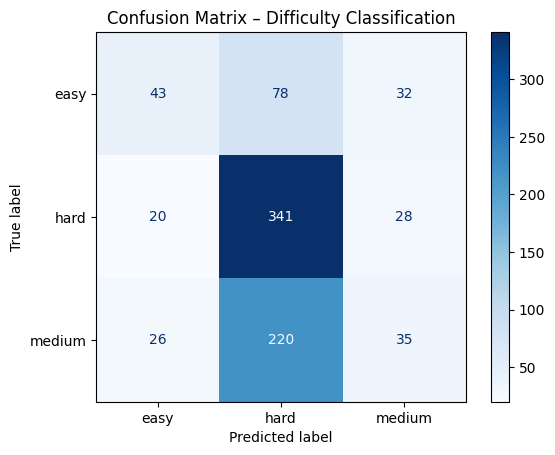

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

labels = np.unique(y_test)

cm = confusion_matrix(y_test, y_pred, labels=labels)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=labels
)

plt.figure(figsize=(6,5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix – Difficulty Classification")
plt.show()


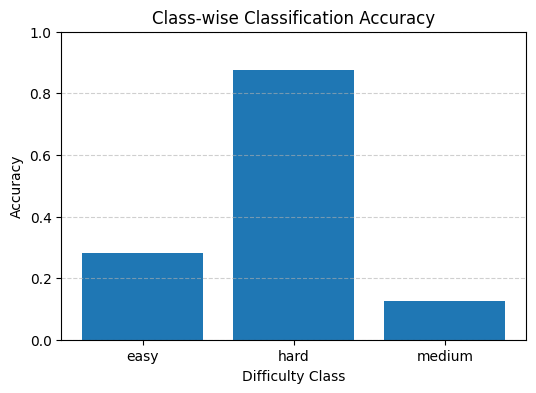

In [12]:
class_accuracy = cm.diagonal() / cm.sum(axis=1)

plt.figure(figsize=(6,4))
plt.bar(labels, class_accuracy)
plt.ylim(0, 1)
plt.title("Class-wise Classification Accuracy")
plt.xlabel("Difficulty Class")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


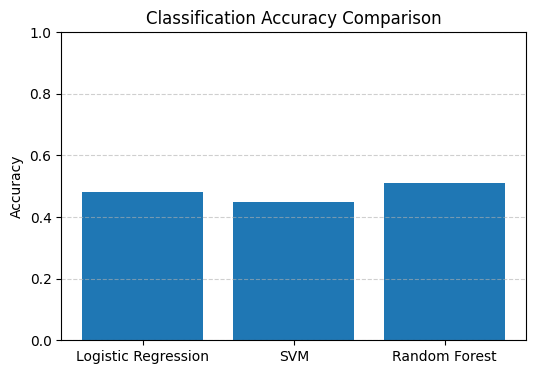

In [13]:
import matplotlib.pyplot as plt

accuracies = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, rf_pred)
]

models = ["Logistic Regression", "SVM", "Random Forest"]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.ylim(0, 1)
plt.title("Classification Accuracy Comparison")
plt.ylabel("Accuracy")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


<Figure size 600x500 with 0 Axes>

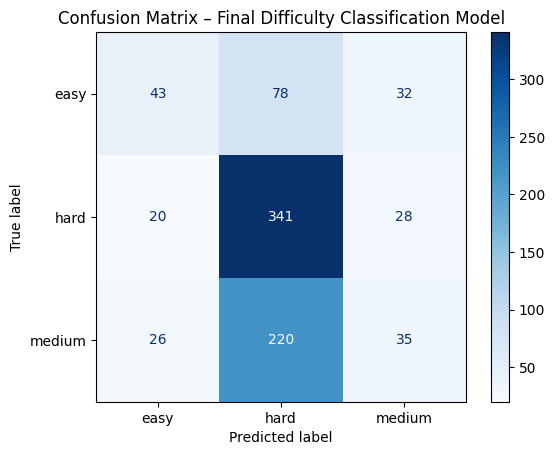

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

labels = sorted(y_test.unique())

cm = confusion_matrix(y_test, y_pred, labels=labels)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=labels
)

plt.figure(figsize=(6,5))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix – Final Difficulty Classification Model")
plt.show()


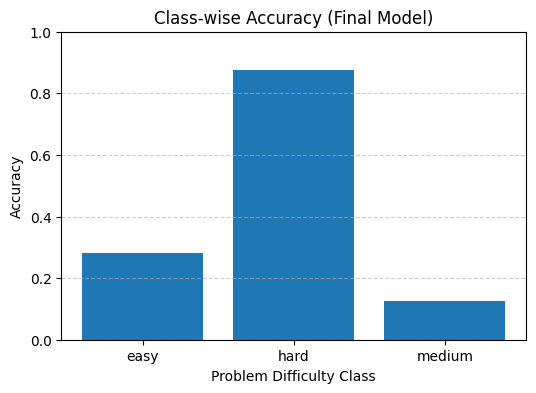

In [15]:
class_accuracy = cm.diagonal() / cm.sum(axis=1)

plt.figure(figsize=(6,4))
plt.bar(labels, class_accuracy)
plt.ylim(0, 1)
plt.title("Class-wise Accuracy (Final Model)")
plt.xlabel("Problem Difficulty Class")
plt.ylabel("Accuracy")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


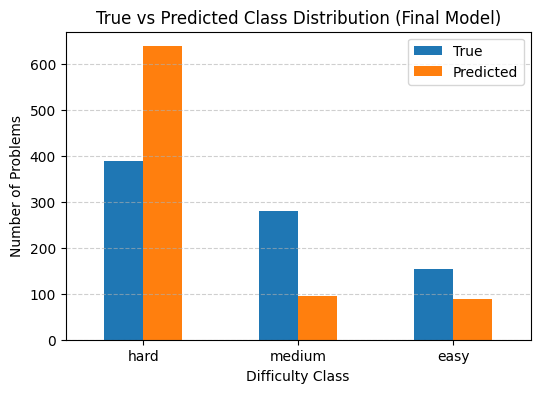

In [16]:
import pandas as pd

true_counts = pd.Series(y_test).value_counts()
pred_counts = pd.Series(y_pred).value_counts()

df_counts = pd.DataFrame({
    "True": true_counts,
    "Predicted": pred_counts
}).fillna(0)

df_counts.plot(kind="bar", figsize=(6,4))
plt.title("True vs Predicted Class Distribution (Final Model)")
plt.xlabel("Difficulty Class")
plt.ylabel("Number of Problems")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


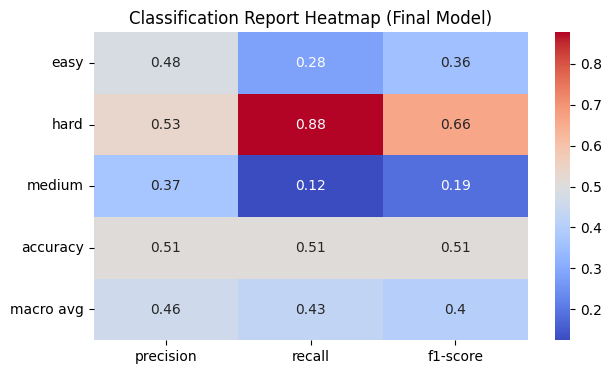

In [17]:
import seaborn as sns

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(7,4))
sns.heatmap(
    df_report.iloc[:-1, :-1],
    annot=True,
    cmap="coolwarm"
)
plt.title("Classification Report Heatmap (Final Model)")
plt.show()


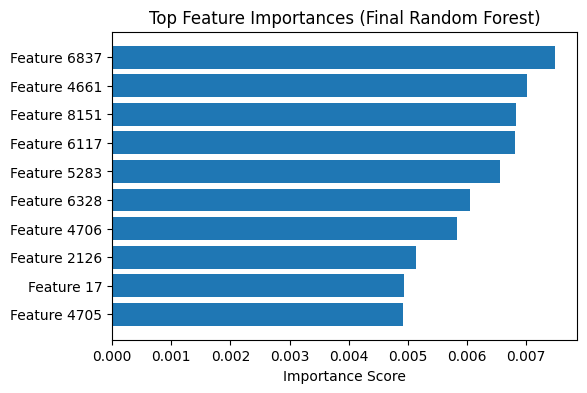

In [18]:
import numpy as np

importances = clf.feature_importances_
top_idx = np.argsort(importances)[-10:]

plt.figure(figsize=(6,4))
plt.barh(range(len(top_idx)), importances[top_idx])
plt.yticks(range(len(top_idx)), [f"Feature {i}" for i in top_idx])
plt.title("Top Feature Importances (Final Random Forest)")
plt.xlabel("Importance Score")
plt.show()
